## Objectivism

In [1]:
from tkinter import *
import tkinter.messagebox
import numpy as np

In [2]:
# Return and covariance matrix
Arz_str = np.array([['ATOM' , 'LTC' , 'XRP' , 'ADA' , 'DOT']])
return_Arz =np.array([[0.1360 , 0.1146 , 0.0814 , 0.0762 , 0.1021]])
translate_Profit_Arz = return_Arz.transpose()
Market_return = 0.0869
Market_fluctua = 0.0046
#matrix_return = np.array([[-0.0863 , -0.0042 , -0.0507 , 0.0598 , -0.0453],
#                          [0.0863 , -0.2209 , -0.0166 , -0.1475 , -0.0629],
#                          [-0.2292 , 0.3608 , -0.2033 , -0.0794 , -0.1741],
#                          [-0.0514 , 0.5561 , 0.1035 , 0.0228 , -0.0024],
#                          [-0.3203 , 0.0780 , -0.0066 , -0.1354 , -0.1453],
#                          [-0.2305 , 0.0948 , -0.0523 , -0.1199 , -0.1709]])
#matrix_cov = np.cov(matrix_return,rowvar=False)

matrix_cov = np.array([[0.1066 , 0.0138 , 0.0447 , 0.0400 , 0.0901],
                       [0.0138 , 0.0818 , 0.0264 , 0.0308 , 0.0079],
                       [0.0447 , 0.0264 , 0.0427 , 0.0292 , 0.0306],
                       [0.0400 , 0.0308 , 0.0292 , 0.0553 , 0.0412],
                       [0.0901 , 0.0079 , 0.0306 , 0.0412 , 0.1096]])
Matrix_cov_inverse = np.linalg.inv(matrix_cov)

# Calculate the weight of each cryptocurrency
ones_array = np.ones ((1, 5), dtype = np.int32)
translate_ones_array = ones_array.transpose()

m_1 = Matrix_cov_inverse.dot(translate_ones_array)
m_2 = Matrix_cov_inverse.dot(translate_Profit_Arz)

a = (ones_array).dot(m_1)
b = (return_Arz).dot(m_1)
c = (return_Arz).dot(m_2)

a_muo = translate_Profit_Arz * a
b_muo = translate_Profit_Arz * b
b_i = translate_ones_array * b
c_i = translate_ones_array * c

g = (1/(2*((a*c)-(b**2))))*Matrix_cov_inverse.dot((c_i-b_muo))
h = (1/(2*((a*c)-(b**2))))*Matrix_cov_inverse.dot((a_muo-b_i))

Weight_Arz = g + (translate_Profit_Arz * h)
translate_Weight_Arz =np.round(Weight_Arz.transpose(),4) 
np.round(translate_Weight_Arz.dot(matrix_cov),4)

# Calculation Profit and Risk 
expected_return = np.round(translate_Weight_Arz.dot(translate_Profit_Arz),4)
objective_func = np.round((translate_Weight_Arz.dot(matrix_cov)).dot(Weight_Arz),4)

In [3]:
root = Tk()

# Variables
investment_profit_num = StringVar()
investment_risk_num = StringVar()
Market_index_profit_num = StringVar()
Market_index_risk_num = StringVar()
Arz_1_str =StringVar()
Arz_2_str =StringVar()
Arz_3_str =StringVar()
Arz_4_str =StringVar()
Arz_5_str =StringVar()
Weight_1_num = IntVar()
Weight_2_num = IntVar()
Weight_3_num = IntVar()
Weight_4_num = IntVar()
Weight_5_num = IntVar()

# Window Structure
root.title('Investor')
root.geometry('600x650')
root.resizable(width=False,height=False)

# Functions
def errormsg(ms):
    
    if ms == 'Error':
        tkinter.messagebox.showerror('Error', 'Wrong investment amount')

def get_investment_amount():

    try:
        Value_1 = float (investment_input.get()) * float (expected_return)
        Value_2 = float (investment_input.get()) * float (objective_func)
        Value_3 = float (investment_input.get()) * float (Market_return)
        Value_4 = float (investment_input.get()) * float (Market_fluctua)
        investment_profit_num.set(Value_1)
        investment_risk_num.set(Value_2)
        Market_index_profit_num.set(Value_3)
        Market_index_risk_num.set(Value_4)
    except:
        errormsg('Error')

Arz_1_str.set(Arz_str[0][0])
Arz_2_str.set(Arz_str[0][1])
Arz_3_str.set(Arz_str[0][2])
Arz_4_str.set(Arz_str[0][3])
Arz_5_str.set(Arz_str[0][4])
Weight_1_num.set(translate_Weight_Arz[0][0])
Weight_2_num.set(translate_Weight_Arz[0][1])
Weight_3_num.set(translate_Weight_Arz[0][2])
Weight_4_num.set(translate_Weight_Arz[0][3])
Weight_5_num.set(translate_Weight_Arz[0][4])

# Window Design
coler_1 = Frame (root,width=600,height=70,background='LightBlue3').pack(side=TOP,padx=2,pady=2)
coler_2 = Frame (root,width=600,height=70,background='LightCyan3').pack(side=TOP,padx=2,pady=2)
coler_3 = Frame (root,width=600,height=200,background='Slategray').pack(side=TOP,padx=2,pady=2)
coler_4 = Frame (root,width=600,height=150,background='LightSkyBlue3').pack(side=BOTTOM ,padx=2,pady=2)
coler_5 = Frame (root,width=300,height=210,background='Seagreen3').pack(side=LEFT,padx=2,pady=2)
coler_6 = Frame (root,width=300,height=210,background='firebrick3').pack(side=RIGHT,padx=2,pady=2)


# Window Entries
Arz_1= Entry(root, width=7, textvariable=Arz_1_str, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=155,y=23)
Arz_2= Entry(root, width=7, textvariable=Arz_2_str, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=240,y=23)
Arz_3= Entry(root, width=7, textvariable=Arz_3_str, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=325,y=23)
Arz_4= Entry(root, width=7, textvariable=Arz_4_str, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=410,y=23)
Arz_5= Entry(root, width=7, textvariable=Arz_5_str, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=495,y=23)

Weight_1= Entry(root, width=7, textvariable=Weight_1_num, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=155,y=95)
Weight_2= Entry(root, width=7, textvariable=Weight_2_num, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=240,y=95)
Weight_3= Entry(root, width=7, textvariable=Weight_3_num, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=325,y=95)
Weight_4= Entry(root, width=7, textvariable=Weight_4_num, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=410,y=95)
Weight_5= Entry(root, width=7, textvariable=Weight_5_num, border=3, font=('Times New Roman',14,'bold'), justify='center',state='readonly').place(x=495,y=95)

investment_input= Entry(root, width=15,border=5,font=('Times New Roman',20,'bold'),justify='center',background='seashell2',fg='black')
investment_input.place(x=185,y=200)
investment_profit_output= Entry(root, width=15, textvariable=investment_profit_num, border=5, font=('Times New Roman',20,'bold'), fg='black',
                                justify='center', state='readonly',).place(x=40,y=420)
investment_risk_output= Entry(root, width=15, textvariable=investment_risk_num, border=5, font=('Times New Roman',20,'bold'), fg='black',
                              justify='center', state='readonly').place(x=345,y=420)
Market_index_profit_output= Entry(root, width = 15, textvariable = Market_index_profit_num, border = 5, font = ('Times New Roman',20,'bold'), 
                                  justify='center', state='readonly',fg='ForestGreen').place(x=60,y=560)
Market_index_risk_output= Entry(root, width = 15, textvariable = Market_index_risk_num, border = 5, font = ('Times New Roman',20,'bold'), 
                                justify ='center', state='readonly',fg='red3').place(x=315,y=560)

# Window Label
name_Arz_label = Label (root, text='Crypto Symbol :', background='LightBlue3', font=('Times New Roman',16,'bold')).place(x=8,y=22)
Weights_label = Label (root, text='Crypto Weight :', background='LightCyan3', font=('Times New Roman',16,'bold')).place(x=8,y=95)
investment_label = Label (root, text='Initial Investment Amount', background='Slategray', font=('Times New Roman',20,'bold')).place(x=150,y=160)
profit_label = Label (root, text='Investor Profit', background='Seagreen3', font=('Times New Roman',20,'bold')).place(x=60,y=370)
risk_label = Label (root, text='Investor Risk', background='firebrick3',font=('Times New Roman',20,'bold')).place(x=370,y=370)
Market_index = Label (root, text='Cryptocurrency Market Index',background='LightSkyBlue3',font=('Times New Roman',20,'bold')).place(x=135,y=510)
# Window Button
investment_button = Button (root, text ='Get Investment',width=20,height=3,border=5, font=('Times New Roman',16,'bold'),background='LightGray',
                            command=lambda:get_investment_amount())
investment_button.place(x=175,y=250)

# Run Window
root.mainloop()

_______________________________


Total Crypto Market Cap (USD): 1085.94 Billion USD

[*********************100%***********************]  1 of 1 completed


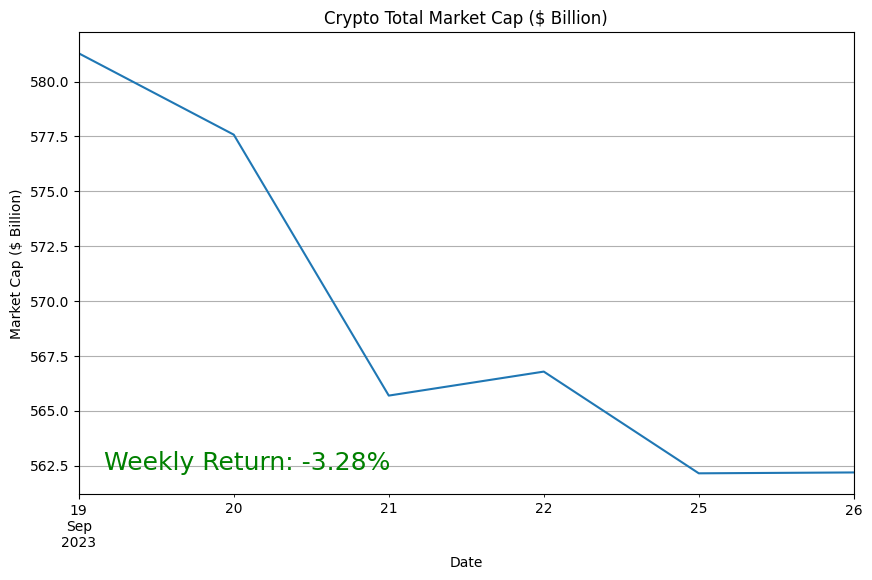

In [66]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import requests

# CoinGecko API endpoint for total market cap
url = "https://api.coingecko.com/api/v3/global"

# Fetch data from the API
response = requests.get(url)
data = response.json()

# Extract total market cap data
total_market_cap = data['data']['total_market_cap']['usd']

# Print the total market cap (you can format and use this data as needed)
print(f"\nTotal Crypto Market Cap (USD): {total_market_cap / 1e9:.2f} Billion USD\n")

# Define the market cap symbol
crypto_marketcap_symbol = "^CMC200"

# Define the start and end dates for data download (last week)
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=7)

# Download crypto market cap data
crypto_marketcap_data = yf.download(crypto_marketcap_symbol, start=start_date, end=end_date)

# Create the crypto market cap chart
plt.figure(figsize=(10, 6))
crypto_marketcap_data['Adj Close'].plot(title="Crypto Total Market Cap ($ Billion)", grid=True)
plt.xlabel("Date")
plt.ylabel("Market Cap ($ Billion)")

# Calculate weekly returns
last_week_close = crypto_marketcap_data['Adj Close'].iloc[0]
current_close = crypto_marketcap_data['Adj Close'].iloc[-1]
weekly_return = ((current_close - last_week_close) / last_week_close) * 100

# Display the weekly return percentage
plt.figtext(0.15, 0.15, f"Weekly Return: {weekly_return:.2f}%", fontsize=18, color='green')

# Show the chart
plt.show()
